In [1]:
from pandas import Series
import pandas as pd
from datetime import date
pd.__version__

'1.0.5'

In [2]:
import matplotlib as mat
mat.__version__

'3.2.2'

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [4]:
# Setando opção do Pandas para mostrar todas as linhas
pd.set_option('display.max_rows', None)

In [5]:
# Setando definição de cores
def color_negative_red(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

In [6]:
# Setando variáveis
ano = 2021
valor_acerto = 0
arquivo_csv = 'arquivos/relatorioOperacoes' + str(ano) + '.csv'
data_acerto = '31/12/' + str(ano)
matrix_acerto = [[2020, '01/07/2020', '-20,79', '0,00'],
                 [2020, '01/09/2020', '2,66', '0,00'],
                 [2021, '02/02/2021', '-1,84', '0,00'],
                 [2021, '17/06/2021', '1,75', '0,00'],
                 [2021, '31/12/2021', '0', '0']]

In [7]:
# Usando o método read_csv
df = pd.read_csv(arquivo_csv, delimiter=";", encoding='ansi')

In [8]:
# Ajustando o CSV (header e coluna vazia)
df.columns.values[0] = df.columns.values[1]
df.columns.values[1] = "temp"
del df["temp"]

In [9]:
#Substitui NaN por "-"
df = df.fillna("-")

In [10]:
# Copia coluna "Lucro/Perda (R$)" para novo Dataframe dfTemp
dfTemp = df["Lucro/Perda (R$)"]

In [11]:
dfFinal = df

In [12]:
# Exclui coluna "Lucro/Perda (R$)" do Dataframe dfFinal
del dfFinal["Lucro/Perda (R$)"]

In [13]:
# Copia índices para exclusão do dfTemp
index = df[df['Ativo'] != '-'].index
# Exclui linhas nulas do dfTemp
dfTemp.drop(index, inplace=True)

In [14]:
# Reorganiza índice dfTemp
dfTemp.index = pd.Categorical(dfTemp.index).codes

In [15]:
# Copia índices para exclusão do dfFinal
index = df[df['Ativo'] == '-'].index
# Exclui linhas nulas do dfFinal
dfFinal.drop(index, inplace=True)

In [16]:
# Reorganiza índice dfFinal
dfFinal.index = pd.Categorical(dfFinal.index).codes

In [17]:
dfFinal[dfTemp.name] = dfTemp

In [18]:
# Adicionando linha com acerto
for x in range(len(matrix_acerto)):
    if ano == matrix_acerto[x][0]:
        linha_nova = {dfFinal.columns.values[0]:matrix_acerto[x][1],
                      dfFinal.columns.values[1]:'Acerto',
                      dfFinal.columns.values[2]:'Acerto',
                      dfFinal.columns.values[3]:'Acerto',
                      dfFinal.columns.values[4]:'Acerto',
                      dfFinal.columns.values[5]:0,
                      dfFinal.columns.values[6]:'0',
                      dfFinal.columns.values[7]:0,
                      dfFinal.columns.values[8]:str(matrix_acerto[x][2]) + ' %',
                      dfFinal.columns.values[9]:str(matrix_acerto[x][3])}
        dfFinal = dfFinal.append(linha_nova, ignore_index=True)

In [19]:
# Conversão da coluna Data de Operação para tipo Data
dfFinal[dfFinal.columns.values[0]] = pd.to_datetime(dfFinal[dfFinal.columns.values[0]], format='%d/%m/%Y')

In [20]:
dfFinal = dfFinal.sort_values([dfFinal.columns.values[0], dfFinal.columns.values[1]], ascending=[True, False])

In [21]:
# Ajustando caracter de decimal e milhar em "Lucro/Perda (R$)", e conversão para float
dfFinal[dfFinal.columns.values[9]] = [x.replace('.','') for x in dfFinal[dfFinal.columns.values[9]]]
dfFinal[dfFinal.columns.values[9]] = [x.replace(',','.') for x in dfFinal[dfFinal.columns.values[9]]]
dfFinal[dfFinal.columns.values[9]] = dfFinal[dfFinal.columns.values[9]].astype(float)

In [22]:
# Removendo sinal de % para cálculos, e conversão para float
dfFinal[dfFinal.columns.values[8]] = [x.replace(' %','') for x in dfFinal[dfFinal.columns.values[8]]]
dfFinal[dfFinal.columns.values[8]] = [x.replace(',','.') for x in dfFinal[dfFinal.columns.values[8]]]
dfFinal[dfFinal.columns.values[8]] = dfFinal[dfFinal.columns.values[8]].astype(float)

In [23]:
del dfFinal['Característica']
del dfFinal['Corretora']

In [24]:
# Ajustando Qtde
dfFinal[dfFinal.columns.values[3]] = dfFinal[dfFinal.columns.values[3]] * 1000

In [25]:
# Ajustando caracter de decimal e milhar em "Preço (R$)", e conversão para float
dfFinal[dfFinal.columns.values[4]] = [x.replace('.','') for x in dfFinal[dfFinal.columns.values[4]]]
dfFinal[dfFinal.columns.values[4]] = [x.replace(',','.') for x in dfFinal[dfFinal.columns.values[4]]]
dfFinal[dfFinal.columns.values[4]] = dfFinal[dfFinal.columns.values[4]].astype(float)

In [26]:
# Calcula vr_compra
vr_compra_bruto = dfFinal[dfFinal.columns.values[3]] * dfFinal[dfFinal.columns.values[4]]
vr_compra = vr_compra_bruto + 4.9 + (vr_compra_bruto * 0.000325)
type(vr_compra)

pandas.core.series.Series

In [27]:
dfFinal['Valor Compra'] = vr_compra

In [28]:
# dfFinal.style.applymap(color_negative_red, subset=['%','Lucro/Perda (R$)'])

In [29]:
# Cria Dataframe com apenas Porcentagem e Lucro/Perda (R$)
df_sum = dfFinal[[dfFinal.columns.values[6], dfFinal.columns.values[7]]].copy()

In [30]:
df_sum.columns.values[0] = 'Porcentagem'

In [31]:
# Agrupa por mês totalizando o lucro/Prejuízo
df_sum_lucro_perda = dfFinal.groupby(dfFinal[dfFinal.columns.values[0]].dt.strftime('%B'))[dfFinal.columns.values[7]].sum()

In [32]:
# Agrupa por mês totalizando a Porcentagem
df_sum_porcentagem = dfFinal.groupby(dfFinal[dfFinal.columns.values[0]].dt.strftime('%B'))[dfFinal.columns.values[6]].sum()

In [33]:
# df_sum_porcentagem.style.applymap(color_elements)

In [34]:
array_meses = [4,8,12,2,1,7,6,3,5,11,10,9]
meses = []
for x in array_meses:
    if x <= date.today().month:
        meses.append(x)

In [35]:
# Cria DataFrame
df_tot_mes = pd.DataFrame({'cd_mes':meses
                         ,'Mês':df_sum_lucro_perda.index.values
                         ,dfFinal.columns.values[7]:df_sum_lucro_perda
                         ,'Porcentagem':df_sum_porcentagem})

In [36]:
df_tot_mes = df_tot_mes.set_index('cd_mes')

In [37]:
df_tot_mes.sort_index(inplace=True)

In [38]:
# Setando separador de milhar
pd.options.display.float_format = '{:,.2f}'.format

# Total no Ano

In [39]:
df_sum.sum()

Porcentagem            64.93
Lucro/Perda (R$)   74,261.27
dtype: float64

In [40]:
dfFinal

,Data da Operação,Tipo Operação,Ativo,Qtde,Preço (R$),Custo Médio (R$),%,Lucro/Perda (R$),Valor Compra
0,2021-01-11,Compra,BIDI4,"2,900.00",41.86,"0,00",0.00,0.00,"121,438.35"
2,2021-01-12,Venda,BIDI4,"2,900.00",42.50,"41,87",1.52,"1,848.53","123,294.96"
1,2021-01-12,Compra,AERI3,"10,400.00",11.92,"0,00",0.00,0.00,"124,013.19"
3,2021-01-13,Venda,AERI3,"10,400.00",12.16,"11,92",2.01,"2,503.74","126,510.00"
4,2021-01-13,Compra,LWSA3,"1,200.00",103.13,"0,00",0.00,0.00,"123,801.12"
6,2021-01-14,Venda,LWSA3,"1,200.00",105.20,"103,14",2.00,"2,483.90","126,285.93"
5,2021-01-14,Compra,CASH3,"4,800.00",25.45,"0,00",0.00,0.00,"122,204.60"
8,2021-01-15,Venda,CASH3,"4,800.00",25.97,"25,46",2.00,"2,448.86","124,701.41"
7,2021-01-15,Compra,AERI3,"9,600.00",13.05,"0,00",0.00,0.00,"125,325.62"
9,2021-01-18,Venda,AERI3,"9,600.00",13.32,"13,06",2.06,"2,590.91","127,918.46"


## Resultado Mensal

In [41]:
# df_tot_mes.style.applymap(color_negative_red, subset=['Lucro/Perda (R$)','Porcentagem'])
df_tot_mes

,Mês,Lucro/Perda (R$),Porcentagem
cd_mes,,,
1,January,"8,835.75",7.28
2,February,-542.60,-0.05
3,March,"14,384.97",12.78
4,April,"10,070.43",7.80
5,May,"-3,651.48",-2.73
6,June,"15,717.06",12.99
7,July,"1,132.64",3.13
8,August,"17,012.94",13.89
9,September,"6,085.66",5.40


<IPython.core.display.Javascript object>


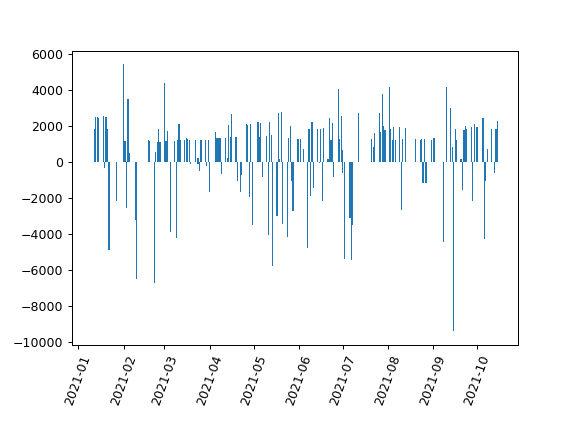

In [42]:
plt.xticks(rotation=70)
plt.subplots_adjust(bottom=0.20)
plt.bar(dfFinal[dfFinal.columns.values[0]], dfFinal[dfFinal.columns.values[7]])
plt.show()

from subprocess import Popen
p = Popen("Executa.bat", cwd=r"C:\Users\esmer\Desktop\Alexandre\Projeto Git\StockManager")
stdout, stderr = p.communicate()